In [ ]:
#텐서플로,케라스 cpu, gpu 선택을 위해 지원되는 디바이스 넘보 보기
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [1]:
from IPython.display import clear_output # clear_output() 으로 아웃풋 제거 가능
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings # 경고가 너무 많이뜨는경우 주피터가 죽음.... 아래 주석 해제하여 워닝끄면 됨
# warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

#한글폰트 적용
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

## 수업 git
- https://github.com/solaris33/dl_cv_tensorflow_10weeks

## 수업 자료
- http://solarisailab.com/fastcampus_dl_cv_10weeks_(6th).html

## 강사님 딥러닝 블로그
- http://solarisailab.com/

---
# ※ 3주차 수업이후 해볼것

>1. 수업에서 사용하는 git 저장소 훑어보기
>2. ~~**[완료!]**~~ 3주차 수업자료 모두 훑어보기
>3. CNN 이미지 학습시 알아야할 여러 기법들의 종류 및 사용용도 정리 (수업 이외의 현재까지 진보된 모든 방법들 찾아보기!)
    - ReLU가 가장 좋은가? no. 찾아보기
    - Fine-Tuning?
    - 앙상블러닝모델? --> 활용도는 대회정도? 에러율을 1%까지 짜내야 되는 수준이 아니면 궂이 사용할 필요까지는 없다
    - 데이터 오그멘테이션 - 전처리에 필수 + 데이터 양이 적을때 시용
    - PCA및 화이트닝, 노멀라이징, 평균이미지 빼기 or 채널별 평균 빼기 등...
    - LRN은 성능에 영향을 주지 않음
    - GoogleLenet 핵심 idea : 
>4. 코드 예습 및 복습하기~!!

---
# ◆ Deep Learning의 정의
1. 딥러닝은 깊은 학습이다
2. 딥러닝은 Feature Learning이다(특징학습)
3. deep learning(CNN,LSTM) < machine learning(로지스틱,svm) < artificial intelligence

### ※ 딥러닝의 역사
- 1세대 : 1943~1986 McCulloch, Warren S., Walter pitts 가 인공신경망의 아이디어를 제안
    - 1958년 Frank Rosenblatt이 퍼셉트론 모형을 제안
    - 1969년 퍼셉트론 모델의 한계 지적됨(선형분리 불가능) --> 인기가 사그라듬
- 2세대 : 1986~2006 Multi-Layer Perceptron(MLP)와 Backpropagation 알고리즘 제안, XOR문제 해결됨(선형분리 가능)
    - 1998년 Yann Lecun의 CNN 구조인 LeNet은 수표인식에 실용적으로 사용됨
    - But. Layer를 깊게 쌓을수록 Gradient가 사라지는 Vanishing Gradient Problem발생
    - 이로인해 Deep Learning은 불가능 --> SVM과 같은 기법이 탐구됨
- 3세대 : 2006~2012 Geoffrey Hinton과 같은 딥러닝 선구자들의 지속적인 연구
    - 2006년 Hinton은 pre-training을 이용해 학습한 Deep Autoencoders의 논문을 발표
    - 이후 RBM, Pre-training, Dropout, ReLU등의 오버피팅 방지 알고리즘들 등장
    - 학습데이터를 손쉽게 얻을 수 있는 인터넷과 대용량처리를 할수있는 GPU의 발전 --> 딥러닝 기법의 부흥
    - 2012년 AlexNet이 이미지 분류 대회에서 압도적 성능으로 우승을 차지함 --> 이로써 글로벌 대기업의 자본들이 딥러닝에 집중됨
- 4세대 : 2012~현재
    - DeepMind는 Deep ANNs와 강화학습을 결합한 Deep-Q-Networks(DQN)을 제안 --> 강화학습에 대한 관심을 불러일으킴
    - 최근에는 GAN에 대한 연구가 활발히 진행중
    
---

## ◆ 머신러닝의 세가지 분류
1. 지도학습(supervised) - labeled data, direct feedback, predict outcome/future
2. 비지도학습(unsupervised) - no labels, no feedback, fine hidden structure
3. 강화학습(reinforcement) - decision process, reward system, learn series of action

## ◆ 머신러닝의 기본 프로세스
1. 학습하고자하는 가성(hypothesis) θ을 수학적 표현식으로 나타낸다.
2. 성능을 측정할 수 있는 비용함수(cost function) J(θ)을 정의한다.
3. cost function을 최소화 할 수 있는 학습알고리즘을 설계한다.

### ▶cost function을 최소화 하는 알고리즘
- Gradient Descent
    - Stochastic Gradient Descent(Mini-batch GD) - 각 회차별로 샘플설정
         - batch GD = 각 회차에 모든샘플을 사용
         - mini-batch GD = 각 회차마다 n개의 샘플을 사용
         - stochastic GD = 각 회차마다 1개의 샘플을 사용
- Cross-entropy
    - Classification 문제에서 softmax regression모델을 사용할결우 cost function으로 자주 사용됨.
    - 모델의 예측값(prediction)이 실제 참(truth)값을 설명하는 데 얼마나 비효율적인지 나타냄.
    - cross-entropy가 낮을수록 좋은모델이다. --> cost 최소화하는 방향의 학습!

---

## ◆ `딥러닝 출발점인 ANN (Artificial NN)`
- MultiLayer Perceptron(MLP)
    - 각각의 질문들은 더 구체적이고 작은 질문들로 분헤(Decompose) 될 수 있다. --> 이 과정은 Weight조정을 통해서 이루어진다.
    
    
## ◆ `다양한 NN구조들`
>- ### Autoencoder
    - input unit 개수와 output unit 개수가 동일한 구조의 NN
    - Hidden Layer는 input정보를 압축적으로 저장 --> 특징(Feature)학습
    - 응용분야 : Feature Extraction
    - 특징 : No Label 데이터에 대한 비지도학습이 가능
 
>- ### Convolutional Neural Networks(CNNs)
    - 응용분야 : 컴퓨터 비전 (Classification)
    - 특징 : conv L + pooling L + Fully connected Layer + softmax
    - 장점 : 이미지와 같이 차원이 큰 데이터도 다룰수 있게됨
    - 단점 : Pooling 과정에서 정보가 손실됨, 위치나 공간에 관련된 정보는 사라짐
     
    
    
>- ### Fully Convolutional Network(FCN)
    - 응용분야 : 컴퓨터 비전 (Detection, Segmentation)
    - 2015년에 발표된 논문, 이전 CNN의 좋은 모델들로부터 classification 방식을 응용,
    - 특징 : conv L + pooling L + Fully connected Layer by 1x1 convolution + [softmax + **bbox regressor**]
    - R-CNN, Fast R-CNN, Faster R-CNN 이 여기에 포함된다. 
    - 문제점 : 너무 작은 object가 무시되거나 엉뚱하게 인식됨, 해상도가 줄어드는 문제, upsampling문제임
    - --> Deconvolutional network를 뒷단에 다시 사용하여 해결
    - ----> coarse-to-fine deconvolution으로 더 정교하게 뽑아낸다. (그런데 Titan X로도 학습에 6일이...)
    - ------> EDconvNet+CRF로 성능개선 (디테일과 모양 모두 가져간다)

>- ### Dliated Convolution
    - 그런데 더 좋은게 실제로 나타났습니다... ---> Front-ent모듈
    - 그런데 합치면 더 좋은 성능을 보였습니다. ---> Front-ent모듈 + context모듈 + CRF-RNN


>- ### Recurrent Neural Networks(RNNs)
    - 응용분야 : 자연어처리
    - 장점 : 시간축이 추가됨으로써 시간적 연속성을 지닌 데이터를 잘 처리할 수 있게됨, 
        - 이전시간의 상태에 대한 정보를 일종의 메모리 형태로 가지고 있을 수 있음
    - 단점 : 연산량의 증가, Vanishing Gradient Problem(시간이 지나면서 이전 시간의 영향력이 작아지다가 사라지는 문제)

>- ### Long-Short Term Memory(LSTM) Networks
    - RNN의 Vanishing Gradient Problem을 해결
    - 응용분야 : 자연어처리(시계열)
    - 장점 : RNNs에 비해 좀더 긴 시간의 dependency를 저장할 수 있음(장기기억 가능)
    - 단점 : 연산량이 증가함

>- ### RBM 제한볼츠만머신 (대세는 아님)
    - 볼츠만 머신에서 층간 연결을 없앤 현태의 모델
    - DBM의 뼤대로서 여러 RBM을 쌓는구조이다.

>- ### DBN 심층신뢰신경망 (대세는 아님)
    - 비지도방식, 훈련용 데이터가 적을때 유용하게 사용됨
    - 기계학습에서 사용되는 그래프 생성모형 - 그냥 이게 기반인 딥러닝모델인듯
    
>- ### Generative Adversarial Networks(GAN)
    - Generator(생성자) vs Discriminator(구분자) --> 가짜를 구분하지 못할정도로 진짜처럼 생성하는걸 목표로 하는 강화학습 기법
    - 응용분야 : 이미지 생성(Image Generation)
    - 장점 : 새로운 이미지 생성가능
    - 단점 : 학습의 어려움 --> DC GAN이 모델 구조를 개선하여 고해상도 생성 가능해짐
    - GAN의 근본적인 문제인 loss의 불안정성을 해결한 Wassertein GAN, D를 AE로 바꾼 EBGAN 등등
    - 2016년 CatGAN, cGAN등의 라벨링과 관련한 것들도 있으니 참고~!
    
>- ### Deep Q-Network (강화학습의 일종) 
    - 행동심리학에서 영감을 받음.
    - 근사 동적 계획법의 연구분야, 마코프 결정 과정을 따름
    - 딥마인드에서 Q-learnin 알고리즘으로 만든 강화학습 모델


## ◆ `시기별 NN구조들`

- 각 NN의 역사 및 자세한 설명, 결과비교 블로그(https://laonple.blog.me/220782324594)


>- ### LeNet
    - 1990년대에 Yann LeCun이 CNN이라는 개념을 성공적으로 도입

>- ### AlexNet ★ (2012년 거의 최초의 이미지 분류기!)
    - 2012년 ILSVRC대회에서 오차율을 최소화 하여 우승 --> 이미지 분류에 CNN이 대세로 쓰이게 된 계기
    - Lenet은 conv레이어 뒤에 pooling이 오는 구조, AlexNet은 conv레이어 뒤에 바로 conv가 위치함

>- ### ZF Net
    - 2013년 ILSVRC대회에서 우승
    - AlexNet의 하이퍼 파라미터를 수정하여 성능개선, 중간의 conv레이어의 크기를 늘림

>- ### GoogleLeNet
    - 2014년 ILSVRC대회에서 우승
    - Inception Module개념 도입 --> 파라미터의 수를 대폭 줄임 (AlexNet 60M --> GoogleLeNet 4M)
    
>- ### VGGNet ★ (많이사용중)
    - 2014년 ILSVRC대회에서 2등
    - 단순한 구조(3x3 conv, 2x2 max pooling) + 16depth ==> 2등???!!!
    - 다중 전달학습과제에서는 GoogleLeNet보다 우수
    - CNN연구그룹에서는 VGGNet의 구조를 선호하는 경향
    - 메모리수, 파라미터수가 크다는게 단점
    
>- ### ResNet ★★ (CNN대세)
    - 2015년 ILSVRC대회에서 우승
    - residual framework 개념 도입 
    - --> Deep한 레이어의 경우 오류 역전파가 사라지는 것 방지 --> 더 개선된 성능!!
    - --> CNN에서는 이제 사람수준으로 오류를 판별하고 더 나은 모습을 보여줄 정도.
    - ----> **Faster R-CNN**과의 결합으로 신의경지에 오름 ㅋㅋㅋㅋ
    - ------> classification, detection, localization 모든 경지에서 우승!
    
    
## ◆ `시중에 나온 성능좋은 NN구조들`

>- ### Inception - (GoogleLenet 파생상품[?])
    - 2016년에 ResNet의 일부 강점을 활용만한(??) v4가 나왔음
    - 이미지인식에 뛰어난 신경망모델 현재 v4까지 나왔고, ResNet과 박빙 --> 압도하나?
    - Inception이라는 개념을 사용함
 
>- ### 
 
>- ### DQN - 강화학습 (딥마인드)
    
---

# ◆ 효율적인 학습테크닉

## ▶ 데이터 전처리단 -----------------------------------
### - image Augmentation
>- 오그멘테이션의 종류 및 활용성 http://nittaku.tistory.com/272?category=742607
- keras 코드 https://datascienceschool.net/view-notebook/0378a43f48a742988897a6629add11fe/
- 보통 데이터수를 늘리는 방법으로 사용되며 CNN에서 주로 활용된다. 
- 오그멘테이션된 데이터로 학습을 하면 나름 빠른 학습이 가능하다.
- 데이터수가 적은 경우에 유리하다.

## ▶ 학습 및 레이어단 -------------------------------------
### - Dropout  (DropConnect)
>- 오버피팅을 줄이기 위한 여러 기법 (출처 https://laonple.blog.me/220818841217)
- 2012년에 발표된 regularization방법 
- overfitting을 방지하기위해선 거의 필수적인것으로 자리잡아왔었음.
- BN이 발표되고 난 이후에는 궂이 DropOut을 쓸 필요가 없다는 주장이 있음.(쓸지는 내 결정에 따름)
- **DropConnect**방식이 이후에 등장 --> 이것이 DropOut을 쓸때보다 쪼금 더 성능이 좋긴하다.


### - Batch Normalization ★(일단은 그냥 무조건 써야된다... 현재는 이거안쓰면 힘들어..)
>- 자세한 설명은 링크참조!(출처 https://laonple.blog.me/220808903260)
- 2015년도에 획기적인 방법 두개중 하나가 BN이다. (다른하나는 Residual Net^^... 응 공부하자)
- 보통 mini-batch SGD 에서는 32~ 256사이의 값을 사용함.(그래픽카드를 효율적으로 쓰기위해, 지금은 512도 될듯??)
- Covariance shift의 문제를 막기위한 두개의 방법중 하나다.(다른 하나는 whitening(백색잡음))
- 이게 나오고 나서 일부는 DropOut을 쓸필요가 없다고 주장한다. 그만큼 활용도가 좋다.

### - Pooling (Stochastic-pooling)
>- 자세한설명 링크참조(출처 https://laonple.blog.me/220830178487)
- 보통 max-pooling을 쓰긴 한다. 그러나아... overfitting문제가 있다.
- 그래서 나온게 스토캐스틱 풀링!
- --> 확률에 따라 적절한 activation을 선택!!
- ---->가장 강한 자극만을 선택하는것이 아닌 최댓값이 아닌 것이라도 정보가 더 중요하면 그 정보를 채택!
- --> 사용하면 iteration이 길어질수록 점점 에러율이 줄어들며 학습효과가 있음을 보인다 => 좋은 해결법!
- 아 keras에 stochastic 풀링이 없넹..... 
- 트레이닝시에는 stochastic pooling, 테스트시엔 Probability Weighting을 쓰면 에러 최소화 굳굳

### - MaxOut (일종의 활성화함수임)
> - 그래 링크를 보자(출처 https://laonple.blog.me/220836305907)
- **DropOut**의 효과를 극대화하기위해 독특한 활성함수를 고안 --> 성능에 큰 영향을 준다! (오호?)
- 활성화 함수지만 좀 독특한 구조이다. ReLU보다 최적화에 유리하고, tanh보다 에려율이 현저히 낮다. 만능인가?
- Maxout + DropOut하면 아주 성능향상이... 꼭 써보고싶다...진짜 써보고싶다

### - 활성화함수(Activation Functions)
>- Sigmoid
- tanh
- ReLU --> 최근에 제안된 활성화함수 = sigmoid의 문제점을 해결하기 위해 제시됨 --> sigmoid보다 6배 빠른 학습속도
- Leaky ReLU
- Maxout
- ELU
- Softmax : 모두 더하면 1이되는 normalized 된 함수임, output은 각각의 Lable에 대해 예측한 확률값이 됨
    - 주로 Classification 문제의 마지막 Layer에 사용

### - 최적화함수(Optimizer)
- 그림설명이 있으니 참고(출처 http://seamless.tistory.com/38)

![](https://t1.daumcdn.net/cfile/tistory/993D383359D86C280D)
![](http://i.imgur.com/pD0hWu5.gif?1)

> - **Gradient Descent** 
    - 가장 기본적인 방식, 기울기의 반대방향으로 그 크기에 비례하게 이동하여 최저값을 찾는다.
    - 정확하긴 하지만 너무너무너무너무너무너무 느리다는 단점....
- **Momentum** (방향성)
    - GD에 일종의 관성원리를 추가(r값으로 0.9정도 준다) => GD보다 좋은성능
    - but 이전벡터의 정보 저장 => 필요용량 2배증가
- **Adagrad** (스텝사이즈 고려)
    - 각 변수의 stepsize를 다르게 하여 이동 => 빠르게 loss를 줄일때 효과적 => lr을 고려안해도 된다
    - but lr값이 너무 작아져 iteration이 커지게 되면 거의 움직이지 않는 단점
- **Adadelta ★** (스텝사이즈 고려)
    - adagrad의 단점 보완. G값을 구할때 합을 구하는대신 지수평균 이용 --> 너무 작아지는 단점 극복
    - but 딥러닝에 사용시 성능이 더 안좋을때도 종종 있음
- **RMSProp ★** (스텝사이즈 고려)
    - adagrad의 단점 보완하기위해 adadelta와 함께 등장
    - 보통 성능이 Adagrad, adadelta보다 나음
    - momentum을 적용할 수 있음
    - adam과 함께 많이 사용되는 옵티마이저임.
- **Adam ★** (방향성 + 스텝사이즈) <-- **기본적으로는 이것을 쓸것!**
    - RMS와 momentum의 장점을 합침
    - 모든 장점이 결합되어 최고의 성능을 보여줌.
    - 가장 많이 쓰이는 최적화 알고리즘이다.
- **Nadam ★** (방향성 + 스텝사이즈)
    - adam에 방향성을 먼저 고려하도록 momentum대힌 NAG를 적용
    - 성능 나쁘지 않은편
    
  
## ▶학습전후 조정단 ---------------------------------------

### - 하이퍼파라미터 조정
> 1. Manual Search
    - 직관이나 경험에 기반한 파라미터 추정, 결과를 관찰
    - 특정 탐색이론을 따르며, 어떤 이론을 따르냐에 따라 시간과 질이 달라진다.
    - validation set이 필요함
> 2. Grid Search (parameter sweep)
    - 개념은 메뉴얼써치와 비슷, 선험적 지식을 활용하고, 파라미터의 범위를 정한다.
    - 범위안에서 일정한 간격으로 점을 정한다 -> 점들에 대해 1개씩 차례로 실험, 최적의 값을 찾는다 -> 
    - best를 찾으면 그 점을 기준으로 다시 세분화하여 최적값 찾는다.
    - validation set이 필요함
> 3. Random Search
    - 무작위로 최적값을 찾는작업
    - 시간적 제한이 있는경우에는 위의 두 방법보다는 random search가 좋은결과를 내는 경향이 있다.
> 4. Bayesian optimization ★
    - 실험결과를 바탕으로 통계적 모델을 만들고, 이를 바탕으로 다음 탐색을 해야할 방향을 정하는것.
    - Random, Grid search보다 더 짧은 시간에 최적값을 찾아내는 경향이 있음.
    
- Fine-tuning(Transfer Learning) : 이미 학습된 NN을 새로운 Task에 맞게 다시 미세조정한다.


# ◆ 컴퓨터비전 문제/예제들
> ### 기초
- Image Classification (MNIST숫자분류, CIFAR-10이미지분류)
- Inception v3 Retraining
- 한글 Char-RNN(한글 희곡생성)
- Visual Q&A
- Image Captioning
    
> ### 중급
- Deconvolution, DeepDream, Neural Style Transfer
- Generative Model - Variational AutoEncoder(VAE) & Generative Adversarial Networks(GAN)

> ### 고급
- AutoPilot (자가운전)
- Semantic Image Segmentation (이미지 형상 분류)
- Brain Tumor Segmentation (뇌CT 종양 진단)
- Object Detection - YOLO --> R-CNN, Fast R-CNN, Faster R-CNN

> ### 최신
- deep motion 캡쳐 (영상으로 사람모습 및 Surface 실시간 캡쳐)
- 


---
## 텐서플로우를 사용해야하는 이유?
- 파이썬 API
- single API로 cpu/gpu, single/multi, server/laptop 다 커버 가능
- 유연성 : 라즈베리파이, 안드로이드, 윈도우, ios, 리눅스 등등
- 시각화 : 텐서보드 지린다
- 체크포인트 : 실험관리 가능!
- 자동 맞춤
- 커뮤니티 개크다
- 대단한 실험들이 이미 많이 텐서플로로 만들어져있다.

## 텐서플로는?
- TensorFlow는 데이터를 Graph형태(Node, Edge)로 나타낸다.
- Node : operators, variables, and constants
- Edge : tensors
- tensor는 모든 n차원 행렬을 말한다.
- 텐서플로 실행과정
    1. 그래프 생성
    2. Session을 이용한 그래프 상의 연산 수행
    


# ◈ 텐서플로 및 여러가지 딥러닝모델 기초 작성 순서
1. **가설정의(hypothesis)**

>- tf.Variable
- tf.placeholder
- logits = tf.matmul
    
2. **손실함수정의(loss(cost) function)**

>- tf.nn.cross_entropy....
- tf.nn.reduce_mean....
    
3. **최적화정의(optimizer)**

>- tf.train.GradientDescentOptimizer(0.5).minimize(loss)
- tf.train.AdamOptimizer(0.001).minimize(cost)
    
4. **학습(learning)**

>- sess = tf.Session()
- sess.run(tf.global_variables_initializer())
    
5. **모델정확도 측정(prediction and validation)**

>- prediction = tf.equal(tf.argmax....))
- accuracy = tf.reduce_mean(tf.cast(....))

---
---
# ※ 2주차 추가내용==============================

## 영상인식의 어려운점
- 컴퓨터가 인식하는 방식과 사람의 인식차이
- Illumination (밝기변화)
- Deformation (변형)
- Occlusion (가림)
- Background Clutter (배경장애[위장])
- Intraclass variation (같은 클래스, 다양한 형태)

> ### CNN을 활용 ==> RAW Image로부터 특징을 자동으로 학습하자. 


## ◈ CNN의 기초
- ### Convolution (합성곱)
    - 효율적인 특징 추출 및 Dimension 축소
    - 컴뷰터 비전 분야에서 Convolution은 이미지에 특정한 **Fillter**를 적용하여 이미지의 특징을 추출하는데 사용된다.
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCadkirARvaM41nVQZGQ8p_zMsPTJxue9NZSzTB1rrIH9DvEha)
    
- ### Pooling
    - Subsampling 이라고도 함
    - 특징을 압축적으로 표현!
    - MaxPooling을 주로 사용함 
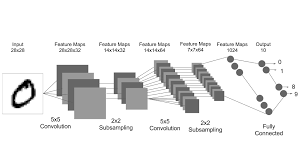

- ### 3차원 데이터의 표현
    - 200x200이미지라면 RGB값을 포함한 200x200x3데이터로 표현된다. 그만큼 가중치가 크다는것을 알아두면 좋다.
    - 시작부터 끝까지 Fully-connectivity는 낭비이다.. --> 많은 수의 모수는 오버피팅으로 귀결됨
    - --> 합리적인 방향으로 아키텍쳐를 구성할 필요
    - 로컬연결성 : 한 뉴런은 전체가 아닌 주변의 뉴런만 연결된다. ==> 영역이 생김(리셉티브 필드) => 이를 하이퍼파리미터라 한다. 
![](https://www.researchgate.net/profile/Hirokatsu_Kataoka/publication/282270749/figure/fig1/AS:613445221232696@1523268146609/AlexNet-and-VGGNet-architecture.png)
(출처 : https://www.researchgate.net/figure/AlexNet-and-VGGNet-architecture_fig1_282270749


## ◆ CNN의 볼륨크기결정요소
- Depth (깊이) = 같은 영역을 바라보는 뉴런들의 깊이 컬럼
- Stride (간격)
    - 값이 작을경우 넓은영역이 겹치면서 출력크기가 커짐
    - 반대로 값이 작으면 겹치는 양도 적고 출력도 작아짐
- Zero padding (가장자리) = 0으로 하는게 좋을때가 있다.(입력볼륨의 크기를 유지하고 싶을때)

- 위의 것들을 함수로 계산했을때 커널사이즈가 정수로 떨어져야 정상이다. 그게 아니라면 stride가 잘못 지정된것임.


- Convolution 레이어의 가중치는 필터,커널로도 불린다.
- Convolution의 결과물은 액티베이션 맵이 된다, 각 깊이에 해당되는 필터의 액티베이션맵을 쌓으면 최종 출력이 됨

## CNN Data Preprocessing
1. Preprocess the data
    - a. original --> Zero-centered data --> Normalized data
    - b. PCA(차원축소), Whitening
2. TLDR : In practice for Images: center only
    - AlexNet의 경우 평균이미지를 뺐음
    - VGGNet의 경우 각 채널마다 각각의 평균을 뺐음
    
## CNN 요즘쓰는 기법
1. ReLU NonLinearity : 오버피팅 방지, 학습속도 6배 증가
2. Multiple-GPU : 학습속도 증가 및 용량증가로 학습데이터의 크기나 레이어 키우기 가능
3. Local Response Normalization : 강한뉴런이 약한 뉴런을 억제하는 현상 방지 --> 성능에 별영향 안준다는것으로 밝혀짐
4. Overlapping Pooling : 기존에는 stride와 filter size의 크기를 같게 하여 overlapping이 없게 했으나. 요즘은 overlapping을 함. --> 성능향상

## CNN Overfitting 방지 기법
1. Data Augmentation
    - Random crops and scales
    - Color Jitter
        - PCA all RGB pixels in training set
        - color offset
        - add offset to all pixels
2. DropOut

## CNN Google inception model LeNet
1. Global Average Pooling
    - 학습해야할 파라미터 개수가 줄어들기때문에 오버피팅 가능성 낮아짐
    - 성능이 많이 좋아진다.
2. Auxiliary Classifier
    - Vanishing Gradient 문제를 방지
    - Test때는 쓰지않음
3. 대회에서는 Google Lenet 7개를 앙상블 학습으로 제출함 
    - 데이터를 나누기때문에 속도가 빠름
    - 성능이 좋아질 수 있음
4. Inception은 최소 이미지 사이즈로 150x150x3을 받는다

- 1x1 convolution을 쓸때의 장점?
    - 차원축소
    - 

## 구글Lenet 코드
1. 디멘션 받기
    - tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, data_format=None, name=None)
2. 풀링, 드롭아웃
    - tf.nn.max_pool
    - tf.nn.dropout
3. 세이버(저장기능)    
    - tf.nn.train.Saver() --> ckpt(체크포인트)파일로 저장됨

---
# ※ 3주차 추가내용 ==============================
- RNN(Recurrent NN), LSTM(Long Short Term Memory), GRU(Gate Recurrent Unit)
- Regularization의 개념과 기법
- Ensemble Learning
- 코드구현
- Character-level Language Modeling을 위한 RNN


# RNN의 기초

- 3주차 수업내용 https://drive.google.com/file/d/1tisA32-BS8A2RTCzoqZgqy0O9-STOI2G/view
- Hidden Layer의 Output을 다음 epoch(?)때 Hidden Layer로 추가하는 형태

### RNN의 특징
- 이전상태에 대한 정보를 메모리형태로 저장할 수 있음 --> 이전데이터와의 연관성이 있을때 강력한 효과
- --> 인간의 언어는 앞뒤 문맥이 중요 --> RNN사용
- 단순한 RNN 은 앞의 정보만 저장하므로 뒤의 정보까지 저장하려면 Bidirectional RNN (BRNN) 필요
- 같은 가중치를 재사용한다(적어도 3번은?)
- 입출력을 다중으로 할 수 있음 1:1~ 다:다
- 역전파 : RNN의 특성으로 인해 기존과는 다른 알고리즘 필요 --> BPTT(BackPropogation Through Time)알고리즘
- --> 이 알고리즘을 통해 현재시간의 에러를 과거시간상태까지 역전파 할 수 있다.
- ----> BUT 계산량이 많아서 보통 5time step까지만 역전파를 한다.(Truncated - BPTT)


# BRNN (Bidirectional RNN) 
- 과거뿐만 아니라 미래상태까지 고려하는 확장된 RNN
- BRNN을 이용하면 이전상태와 이후상태를 모두 저장할 수 있다.
- --> 이는 문맥을 맞추는 자연어 처리에서 큰 효과를 발휘한다.

- 가중치 업데이트 할때 Forward와 Backward 레이어에 들어가는 input값을 반대방향으로 하고, OUTPUT 레이어의 가중치는 두 방향의 레이어에 모든 input이 적용된 후에 업데이트 한다.



### - Vanishing Gradient Problem
- 초기에 들어온 데이터는 이후에 여러 데이터가 순차적으로 들어오면서 영향력이 감소하는 현상이 발생하게 된다. 이후에는 아무련 영향을 끼치지 못하는 현상...
- --> 이 문제를 해결하기 위해 LSTM이 등장! --> 레이어를 메모리블록(3Gate)로 대체한 구조이다.
- input gate를 열고 닫으면서 초기 input데이터의 영향력을 최대한 오래 가져갈 수 있다.
- sigmoid 함수와 미분값이 RNN에서 특히 문제가 된다. 영향도가 급격하게 감소하기때문.

### - Exploding Gradient Problem
- Vanishing GP와는 반대로 지수함수형태로 값이 커져버리는 경우도 있다. 폭발한다고 하자.
- 이 문제는 쉽게 알아차릴 수 있다. 값이 엄청나게 커지면 결국엔 NaN값이 되고 이는 숫자형태가 아니게 되므로 프로그램이 죽을것이기 때문
- 그럼에도 VGP가 더 관심받았던것음
    1. EGP는 쉽게 알아차린다.
    2. 너무 값이 커지면 미리 정해준 적당한 값으로 자르면 된다.
    3. Gradient Clipping 기법을 사용하면 해결이 가능

### - Solution - ReLU, LSTM Networks

- Vanishing Gradient problem의 가장 좋은 해결법은 LSTM Networks를 이용하는것이다. 





# LSTM
- 대부분의 복잡한 실제문제에서는 RNN사용시 LSTM구조를 이용한다.
- -- 가장좋은 성능을 보여주기 때문

### - Memory block
1. input 레이어에서 들어오는 데이터 X는 일단 3개의 Gate와 Block의 입구를 통해 전달된다.
2. Memory Block의 OUTPUT b_h은 위의 4개의 입구로 전달된다.
3. Memory Block의 Cell output s_c는 3개의 Gate로 전달된다.
4. 한 블록에서는 5번의 연산이 수행된다.
    - input Gate
    - Forget Gate
    - Cells
    - Output Gate
    - Cells Outputs(Memory block Output)
    
#### 직관적으로는 RNN은 LSTM의 특수케이스로 생각할 수 있음
- input Gate를 전부 1로
- Forgot Gate는 전부 0으로(이전 메모리는 무조건 까먹음으로 둠)
- output Gate를 전부 1로
- 출력값 특정범위 해주는 tanh 추가
- --> RNN형태 완성~!

### - LSTM Gates & Cells
>### Forget gate
- 값이 1이면 정보를 완전히 가져감(열려있음)
- 값이 0이면 정보를 완전히 버림(닫혀있음)

>### input gate
- 어떤 정보를 업데이트 할 것인가?
- tanh 레이어는 state에 더해질 수 있는 새로운 후보값인 c_t값을 만든다.

>### Cell Value Update
- 이전 state값과 forget gate의 출력값을 곱하고, input gate의 출력값과 새로운 후보값을 곱하고 더해서 state값을 업데이트

>### Output gate
- Cell state에 tanh를 씌우고 sigmoid 레이어의 값과 곱해서 output gate 값을 구한다.
- 이는 얼만큼 출력할 것인지를 결정한다.


# GRU (Gate Recurrent Unit)

- LSTM의 구조와 비슷하다. 다만 간결화한 블록구조이며 LSTM과는 달리 OUTPUT Gate가 없다.

- LSTM과 GRU의 차이점?
    - Gate가 2개이다. (LSTM은 3개)
    - GRU는 internal memory 정보를 저장하지 않음
    - 출력에서 비선형 activation을 적용하지 않음
- 더 간단한 구조임에도 LSTM와 거의 비슷한 성능을 보인다고 한다.
- --> 계산량이 적고 메모리사용량도 적으니 학습이 빠르고, 더 적은 데이터로도 좋은 성능을 쉽게 끌어올릴 수 있다고 한다. 대세는 GRU!!
    

- 자연어 처리 학습을 하면 train은 잘 되지만 validation이 한참 미치지 못하는것을 볼 수 있다. 어떻게 해야할까?


--- 
# 문제를 해결하고 성능향상 시키는 방법은?

## Ensemble Learning
- 앙상블학습은 여러개의 분류기를 학습시킨 다음 Test시에 이들의 평균 혹은 다수결 투표를 이용하는것이다.

## Regularization
- 모델의 복잡도를 낮춰서 Test데이터에 대한 정확도를 높인다.
- 그리고 Overfitting을 방지한다.

#### - 기법1 : Regularization Term in Cost function
- Regularization Term을 Loss function에 추가해서 Weight가 너무 커지는것을 방지한다.

#### - 기법2 : DropOut
- 이것도 일종의 앙상블 기법이라 볼 수 있다.

#### - 기법3 : Data Augmentation
- 트레이닝 데이터의 다양성과 양을 늘려서 Overfitting을 방지한다.

#### - 기법4 : BatchNormalization
- 배치단위로 정규화를 해줌으로 학습을 안정화시킨다.(성능 및 속도향상)
- activation Function 이전에 적용해준다.



# 데이터 처리전 분석을 쉽게 할수 있는 툴
# SPSS , ORANGE 한번 찾아볼것!

In [2]:
import tensorflow as tf

In [3]:
#--training data
x_data = [1,2,3]
y_data = [3,6,9]
W=tf.Variable(tf.random_uniform([1],-1.0,1.0))
b=tf.Variable(tf.random_uniform([1],-1.0,1.0))
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)
hypothesis=W*X+b
cost=tf.reduce_mean(tf.square(hypothesis - Y))
#Minimize
a= tf.Variable(0.1)#Learning rate,alpha
optimizer=tf.train.GradientDescentOptimizer(a)
train=optimizer.minimize(cost)

init=tf.global_variables_initializer()

#Launch the graph
sess=tf.Session()
sess.run(init)

for step in range(2001):
    sess.run(train,feed_dict={X:x_data,Y:y_data})
    if step%200==0:
        print(step,sess.run(cost,feed_dict={X:x_data,Y:y_data}),sess.run(W),sess.run(b))

#Learns best fit is W:[1],b:[0]
print(sess.run(hypothesis,feed_dict={X:5}))
print(sess.run(hypothesis,feed_dict={X:2.5}))
sess.close()


0 0.944643 [2.4247744] [2.0013645]
200 3.0344529e-05 [2.9936023] [0.01454359]
400 1.7978437e-09 [2.9999506] [0.00011189]
600 5.494864e-13 [2.999999] [1.6115649e-06]
800 0.0 [3.] [1.1747527e-07]
1000 0.0 [3.] [1.1747527e-07]
1200 0.0 [3.] [1.1747527e-07]
1400 0.0 [3.] [1.1747527e-07]
1600 0.0 [3.] [1.1747527e-07]
1800 0.0 [3.] [1.1747527e-07]
2000 0.0 [3.] [1.1747527e-07]
[15.]
[7.5]
